# Visualizing Convolutional Filters Output

**Copying VGG16 architecture code**<br>
Code for VGG16 architecture copied from: https://github.com/ashushekar/VGG16/blob/master/implementation.py

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model, Model
from keras.optimizers import Adam

# Generate the model
model = Sequential()
# Layer 1: Convolutional
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
# Layer 2: Convolutional
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 3: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 4: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 5: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 6: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 7: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 8: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 9: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 10: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 11: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 12: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 13: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 14: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 15: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 16: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 17: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 18: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 19: Flatten
model.add(Flatten())
# Layer 20: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 21: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 22: Softmax Layer
model.add(Dense(units=2, activation='softmax'))

# Add Optimizer and check accuracy metrics
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
# Check model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

**Store all the layers of the network in a variable**

In [2]:
layers=model.layers

In [3]:
len(layers)

22

In [4]:
layers #first convolutional layer is at 0th index

## Lets only look at the first convolutional layer

In [5]:
filters, biases = model.layers[0].get_weights()

In [6]:
#filters for first layer
filters.shape

(3, 3, 3, 64)

We have 64 filters of 3x3x3 dimensions
>3x3x3(rgb)x64(filters)

In [7]:
filters

array([[[[ 0.09566717, -0.03617512,  0.09071614, ..., -0.01985861,
           0.07674092,  0.08818392],
         [-0.08629467,  0.06327912,  0.02293934, ..., -0.00899567,
          -0.0518922 , -0.03189278],
         [ 0.03604937, -0.00634288, -0.017987  , ...,  0.09098049,
          -0.08548217, -0.04033884]],

        [[-0.02594142,  0.06832322,  0.06217919, ..., -0.08296141,
           0.02303466, -0.06256342],
         [ 0.07635923,  0.06803115,  0.04181264, ...,  0.02807935,
          -0.02168731,  0.03545049],
         [ 0.05719019, -0.08855893,  0.07586543, ..., -0.03956588,
           0.08669661, -0.02658731]],

        [[ 0.07429051, -0.06759413, -0.04930723, ...,  0.04079475,
           0.05043809,  0.0512889 ],
         [-0.00651678, -0.01048367,  0.06845222, ..., -0.09219719,
           0.02760574,  0.03090173],
         [ 0.04013783,  0.03475143, -0.04675692, ..., -0.0194533 ,
           0.01730161, -0.018209  ]]],


       [[[ 0.03197937, -0.00588899, -0.05957158, ...,  0

In [8]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Plot the 64 filters**

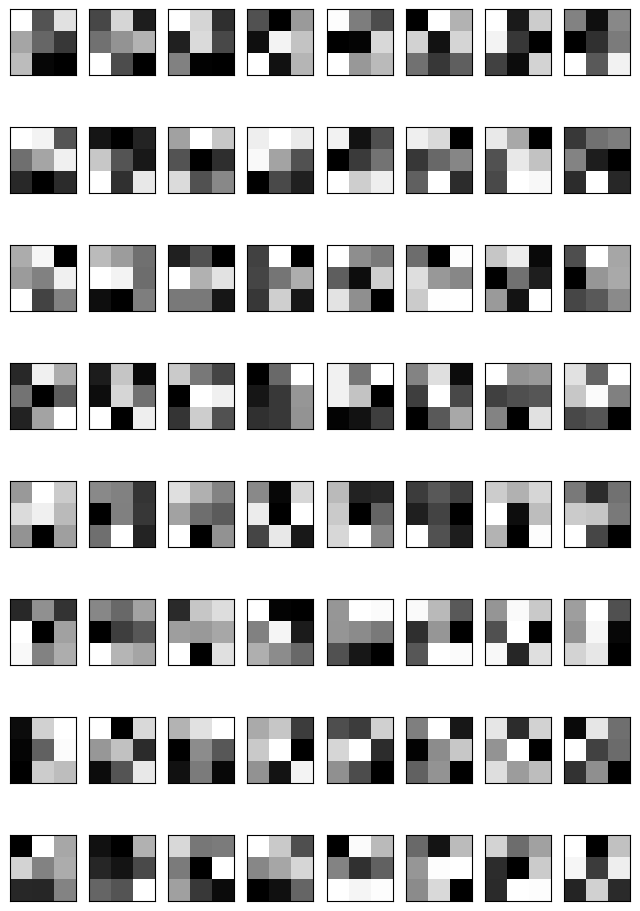

In [9]:
fig1 = plt.figure(figsize=(8,12))
columns=8
rows=8
n_filters = columns*rows

for i in range(1,n_filters+1):
    f = filters[:, :, :, i-1]
    fig1 = plt.subplot(rows,columns, i)
    fig1.set_xticks([]) #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #show only filters from 0th channel (R)

plt.show()


As we can see above we have printed out 64 filters. It would have been 64x3 = 192 filters (64 for each channel), but we're printing out filters for only the first channel.

## Lets take the first three convolutional layers

In [10]:
layers

First three convolutional layers are at index 0,1 and 3

In [11]:
conv_layer_index=[0, 1, 3]

**We're going to create a new short model with only the first 3 convolutional layers, then we will take an image and pass it to this short model and see how the output looks like**

In [12]:
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
model_short.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
Total params: 112,576
Trainable params: 112,576
Non-trainable params: 0
_______________________________________________________

**Load an image and preprocess it**

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

img = load_img('mona_lisa.jpg', target_size=(224, 224))
img_array = img_to_array(img)
img_array.shape

(224, 224, 3)

In [14]:
img_preprocessed = preprocess_input(img_array)
#expand so it meets the model input layer shape requirements
# n*x*y*3(channels)
img_preprocessed = np.expand_dims(img_preprocessed, axis=0)
img_preprocessed.shape

(1, 224, 224, 3)

**Predict the image by our short model**

In [15]:
#generate feautre output by predicting an input image
feature_output = model_short.predict(img_preprocessed)

1/1 [==============================] - 1s 1s/step


In [16]:
len(feature_output)

3

In [17]:
feature_output

[array([[[[ 0.9825213 ,  0.        , 10.769527  , ...,  0.        ,
            0.        ,  3.0649912 ],
          [ 3.0071156 ,  0.        , 17.157753  , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.68579066,  0.        ,  6.133838  , ...,  0.        ,
            2.060998  ,  0.        ],
          ...,
          [ 1.1580896 ,  0.        , 16.625551  , ...,  0.        ,
            0.        ,  0.        ],
          [ 2.0795858 ,  0.        , 21.40878   , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  1.4242853 , ...,  0.        ,
            9.421745  ,  0.        ]],
 
         [[ 0.        ,  0.        ,  6.3077717 , ...,  1.7612429 ,
            0.        ,  7.0590296 ],
          [ 0.        ,  0.        ,  9.584952  , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  3.332368  , ...,  0.        ,
            0.        ,  0.        ],
          ...,
          [ 0

Response from convolutional layer 1


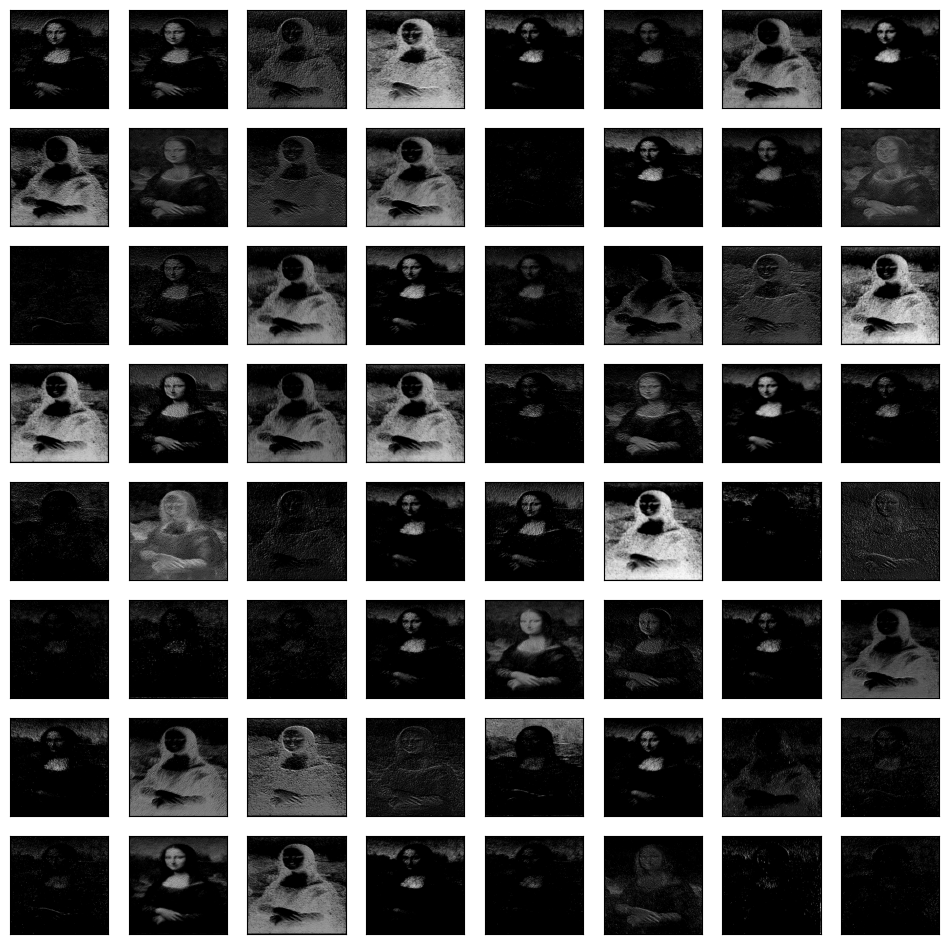

Response from convolutional layer 2


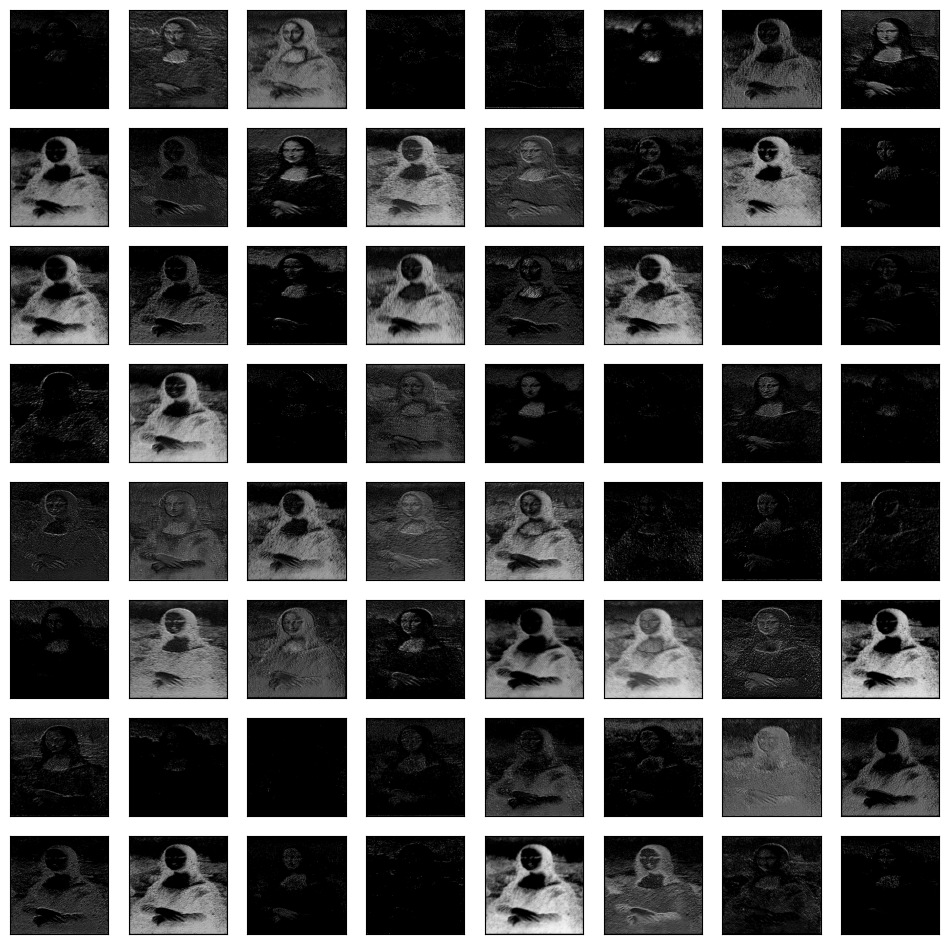

Response from convolutional layer 3


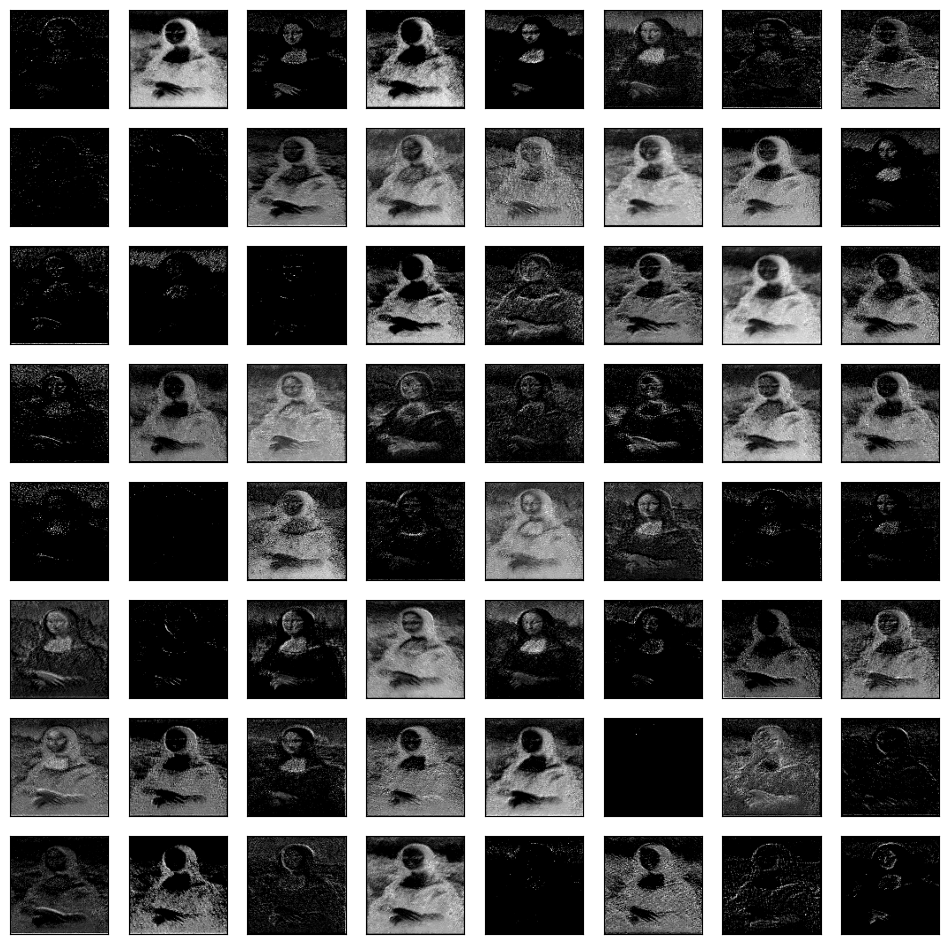

In [29]:
columns = 8
rows = 8

for ftr, j in zip(feature_output,range(1,4)):
    print(f"Response from convolutional layer {j}")
    fig = plt.figure(figsize=(12,12))
    for i in range(1, columns*rows+1):
        fig = plt.subplot(rows, columns, i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')  
    plt.show()

Note that the third convolutional layers has actually 128 feature outputs but we're only printing 64 of them.<br>Let's plot 121 of the 128 feature outputs by the 3rd convolutional layer.

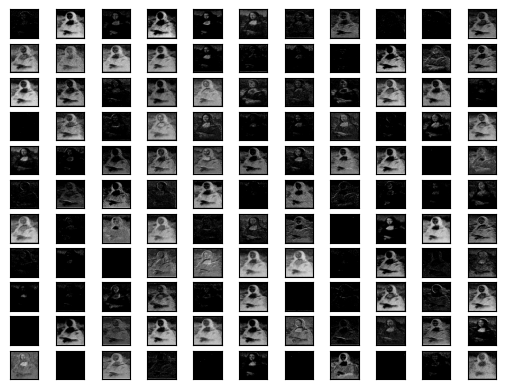

In [33]:
third_feat_out=feature_output[2]
columns=11
rows=11

for i in range(1, columns*rows+1):
    fig = plt.subplot(rows, columns, i)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(ftr[0, :, :, i-1], cmap='gray')  
plt.show()